In [ ]:
!pip install numpy pandas scikit-learn wandb opencv-python matplotlib

In [14]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
import wandb
import os
wandb.login(key=os.environ["WANDB"])

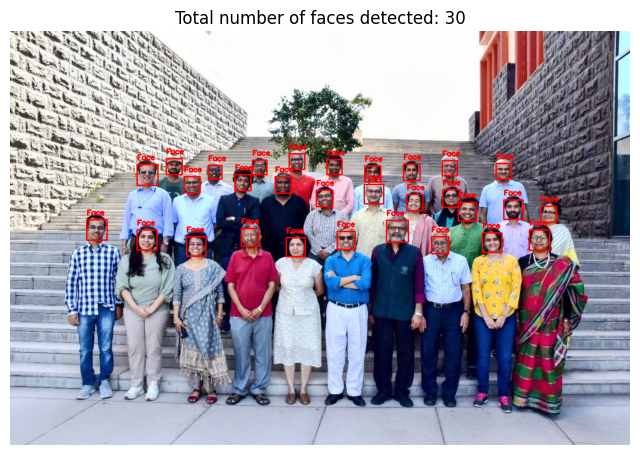

In [ ]:


# Load image
img = cv2.imread("./Plaksha_Faculty.jpg")

# Check if the image is loaded
if img is None:
    raise ValueError("Image not found. Check the file path!")

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Draw rectangles around faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Convert BGR to RGB for displaying in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Total number of faces detected: {len(faces_rect)}")
plt.savefig("face_detection.png")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


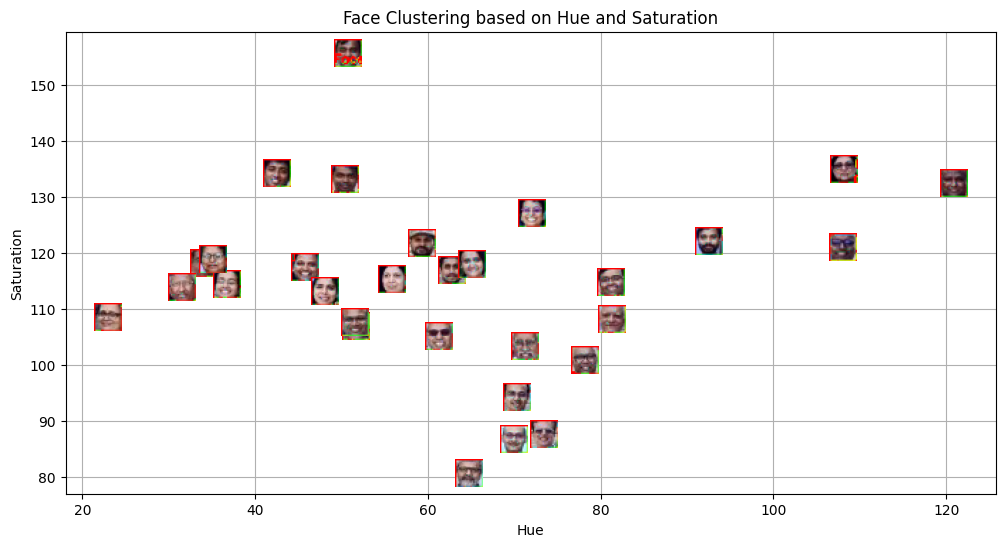

In [17]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering based on Hue and Saturation")
## Put grid
plt.grid(True)
plt.savefig("face_clustering.png") 
## show the plot
plt.show()

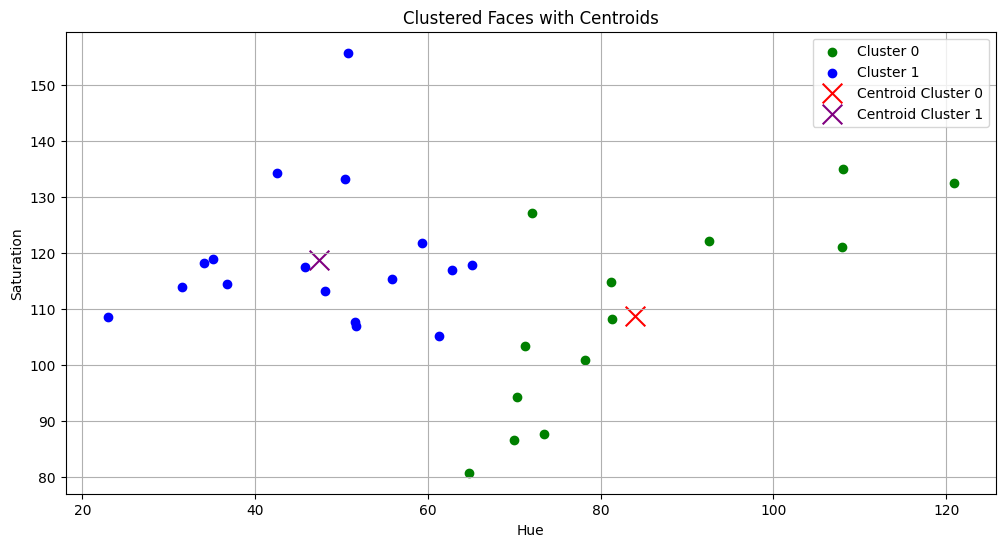

In [18]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if labels[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0) if len(cluster_0_points) > 0 else None
centroid_1 = np.mean(cluster_1_points, axis=0) if len(cluster_1_points) > 0 else None

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=200, label='Centroid Cluster 0')
plt.scatter(centroid_1[0], centroid_1[1], color='purple', marker='x', s=200, label='Centroid Cluster 1')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces with Centroids")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
plt.savefig("cluster_centroids.png") 
## Show the plot
plt.show()

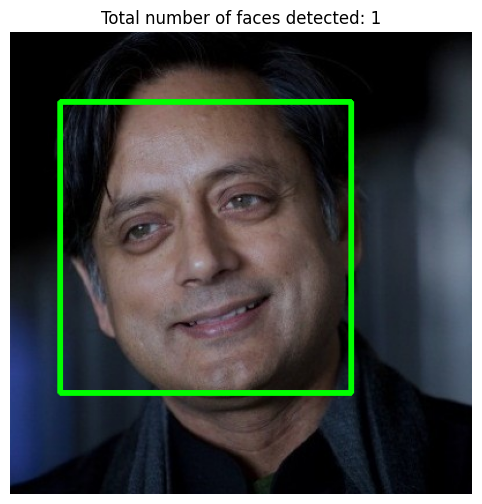

In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img_path = "./Dr_Shashi_Tharoor.jpg"
template_img = cv2.imread(template_img_path)  # Read the image
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
# Convert BGR to RGB for displaying in matplotlib
img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

# Display image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Total number of faces detected: {len(template_faces)}")
plt.savefig("shashi_tharoor_face.png")
plt.show()

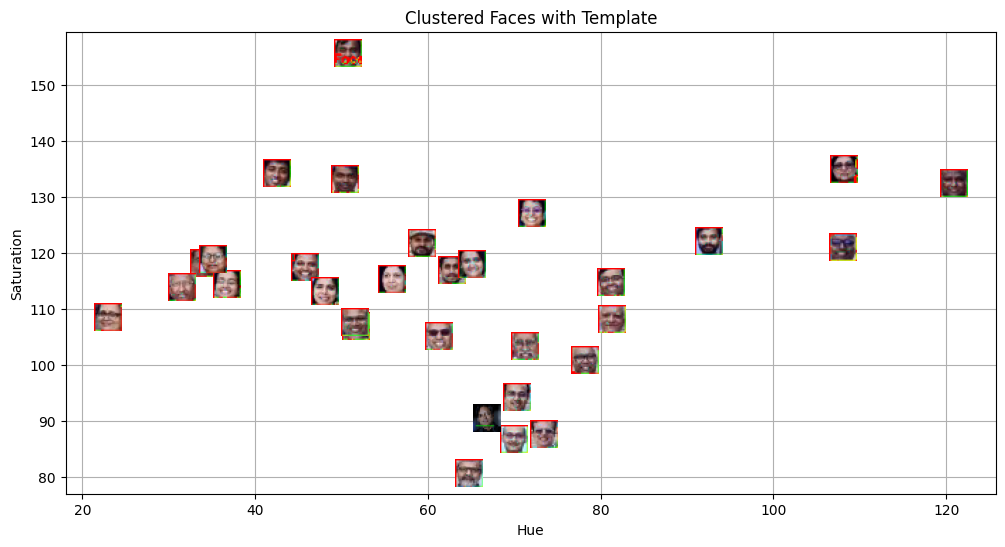

In [20]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_features = np.array([[template_hue, template_saturation]]) 
template_label = kmeans.predict(template_features)

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Clustered Faces with Template")

## Add grid
plt.grid(True)
plt.savefig("template_classification.png")
## show plot
plt.show()

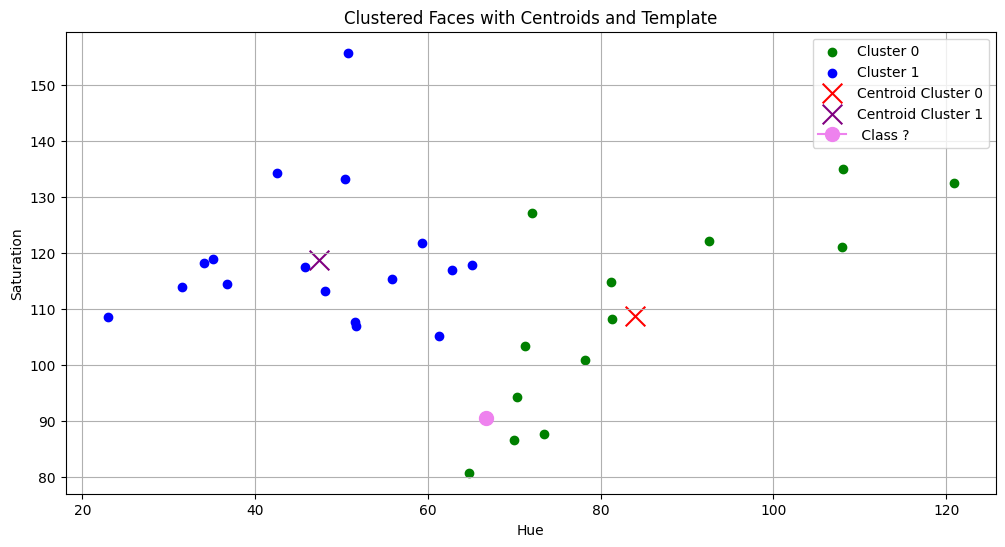

In [21]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0) if len(cluster_0_points) > 0 else None
centroid_1 = np.mean(cluster_1_points, axis=0) if len(cluster_1_points) > 0 else None
if centroid_0 is not None:
    plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=200, label='Centroid Cluster 0') ## plot for centroid 0
if centroid_1 is not None:
    plt.scatter(centroid_1[0], centroid_1[1], color='purple', marker='x', s=200, label='Centroid Cluster 1') ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

# Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Clustered Faces with Centroids and Template")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)
plt.savefig("clustered_faces_plot.png")
## Show the plot
plt.show()
                                            ## End of the lab 5 ##

In [22]:
wandb.init(project="distance_classification")

wandb: Currently logged in as: anjelicaaj08 (anjelicaaj08-plaksha). Use `wandb login --relogin` to force relogin


In [24]:
wandb.log({"Number of Faces Detected": len(faces_rect)})
wandb.log({"Cluster 0 Centroid": list(centroid_0)})
wandb.log({"Cluster 1 Centroid": list(centroid_1)})
wandb.log({"Template Image Cluster": int(template_label[0])})
wandb.log({"Face Detection": wandb.Image("face_detection.png")})
wandb.log({"Face Clustering": wandb.Image("face_clustering.png")})
wandb.log({"Cluster Centroids": wandb.Image("cluster_centroids.png")})
wandb.log({"Template Classification": wandb.Image("template_classification.png")})